In [1]:
import os, sys
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from src.utils.data import load_training_data
from src.utils.train import *
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
def show(i, last_in_dates, input_seq, output_seq, predictions):
    current_date = pd.to_datetime(last_in_dates[i],)
    in_dim, out_dim = input_seq.shape[1], output_seq.shape[1]
    dates = pd.date_range(start=current_date-timedelta(days=in_dim-1),
                          end=current_date+timedelta(days=out_dim))
    data_dic = {}
    data_dic["inputs"] = np.concatenate([input_seq[i, :, 1], np.full((out_dim,), np.nan)])
    data_dic["output"] = np.concatenate([np.full((in_dim,), np.nan), output_seq[i, :, 0]])
    data_dic["predictions"] = np.concatenate([np.full((in_dim,), np.nan), predictions[i, :, 0]])
    data_dic["link"] = np.concatenate([np.full((in_dim-1,), np.nan),np.array([input_seq[i, -1, 1]]), np.array([predictions[i, 0, 0]]), np.full((out_dim-1,), np.nan)])
    data_df = pd.DataFrame(data=data_dic, index=dates)
    data_df.plot()

<AxesSubplot:>

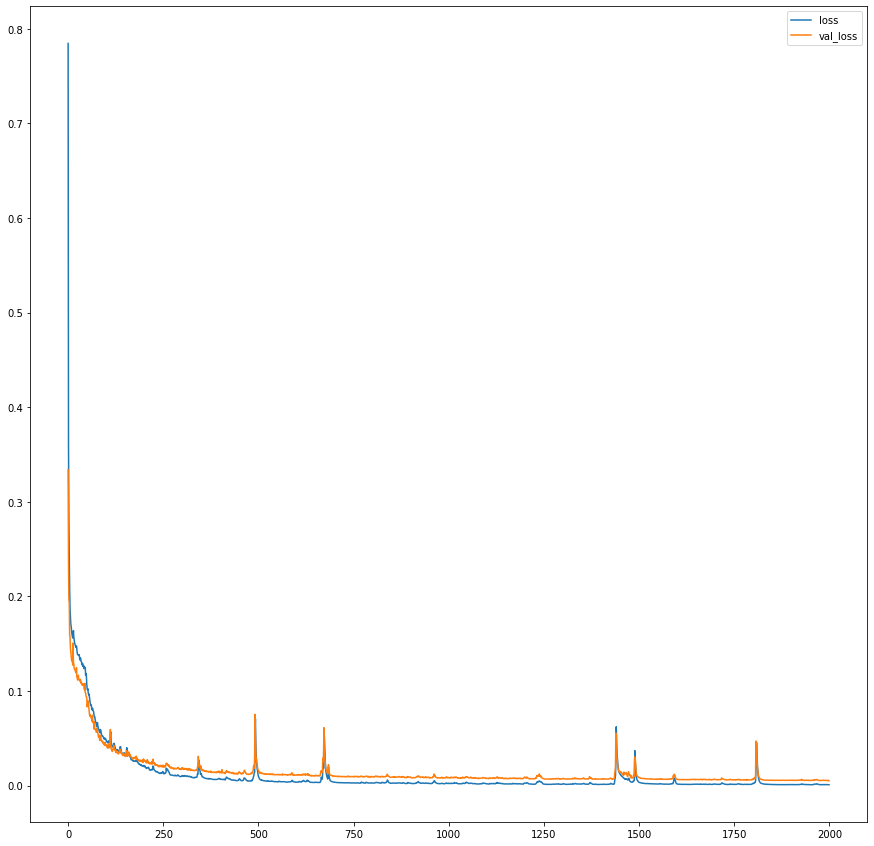

In [3]:
model_folder = "/work/test-first-project/data/models/models_2/"
csv_path = os.path.join(model_folder, "score.csv")
model_path = os.path.join(model_folder, "model")

score_df = pd.read_csv(csv_path)
score_df.plot(figsize=(15,15))

In [4]:
input_seq, output_seq, last_in_dates, country_array = load_training_data()

In [5]:
model = scaled_model(model_folder)

In [6]:
model.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 80)                26560     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 20, 80)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 80)            51520     
_________________________________________________________________
time_distributed (TimeDistri (None, 20, 40)            3240      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 20, 1)             41        
Total params: 81,361
Trainable params: 81,361
Non-trainable params: 0
_________________________________________________________________


In [7]:
predictions = model.predict(input_seq)

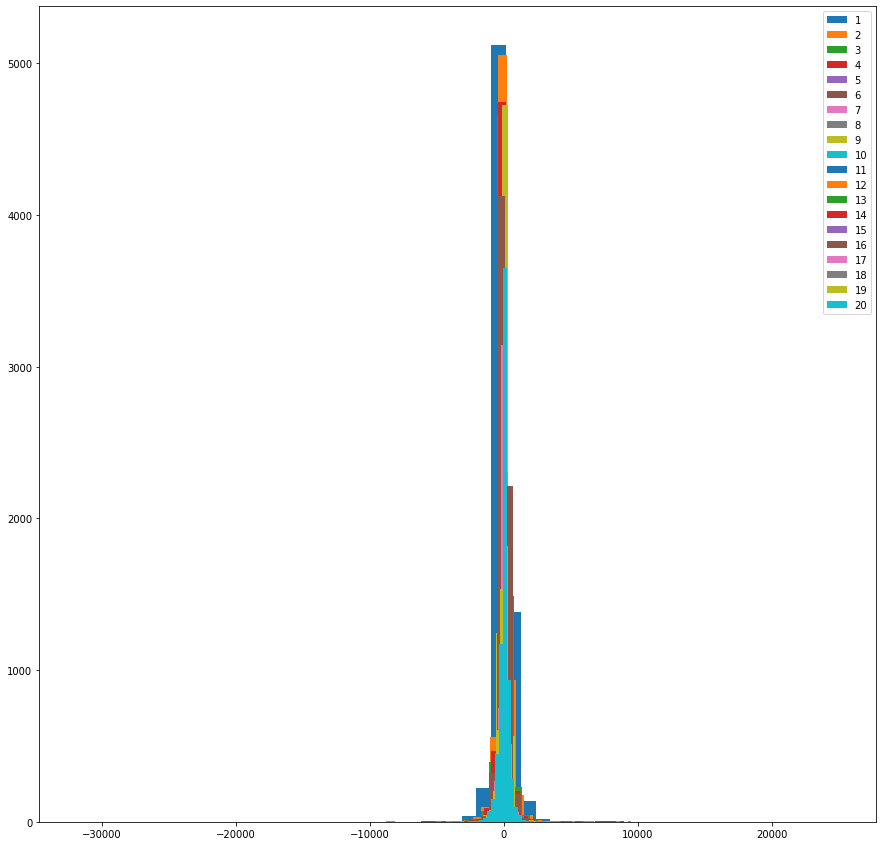

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
for i in range(predictions.shape[1]):
    
    ax.hist(predictions[:, i, :] - output_seq[:, i, :], bins=50, label=str(i+1))
plt.legend()

/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


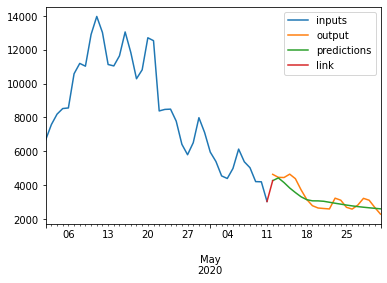

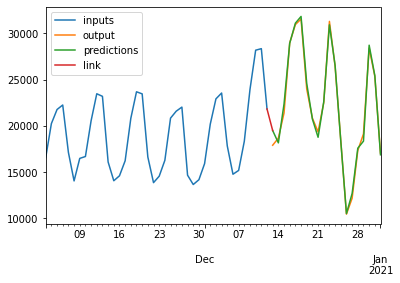

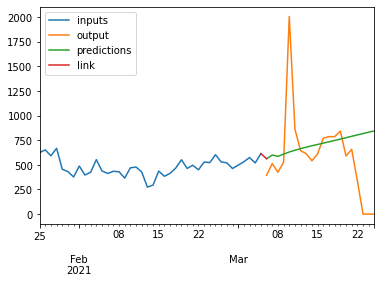

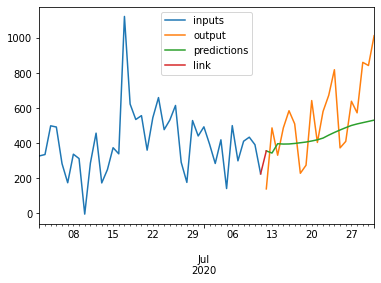

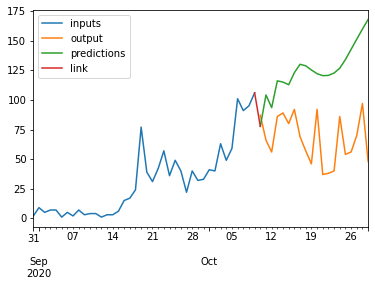

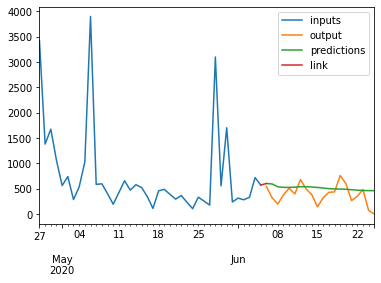

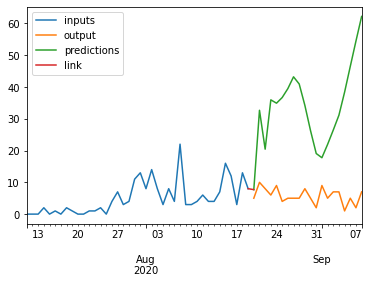

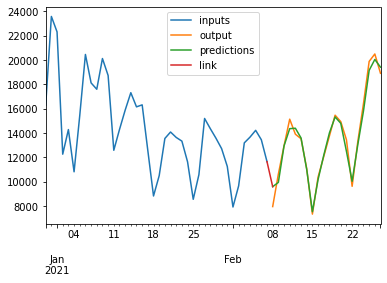

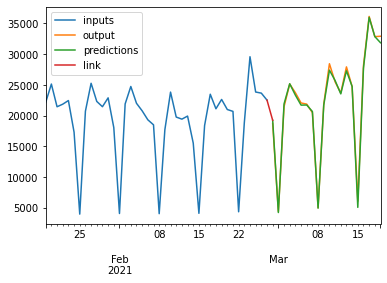

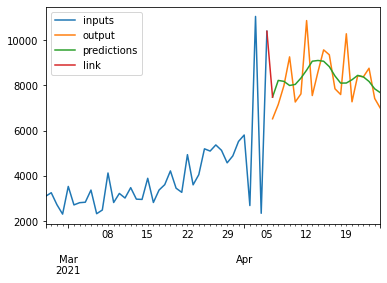

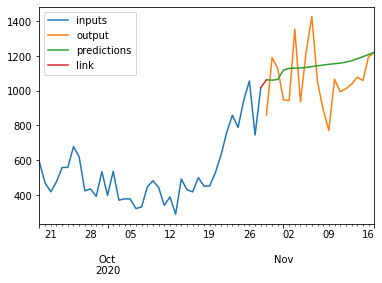

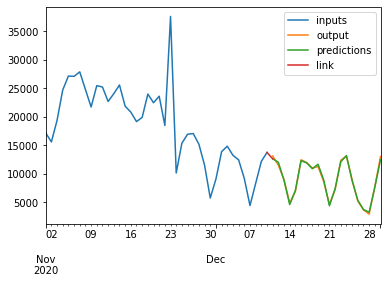

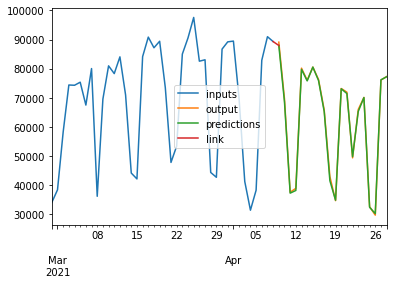

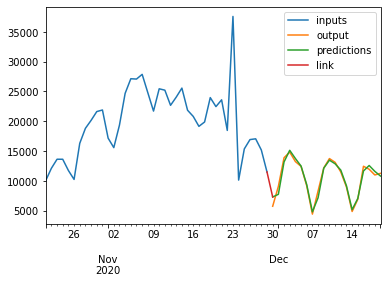

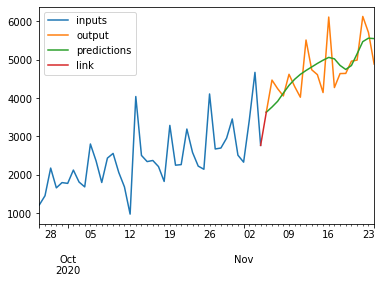

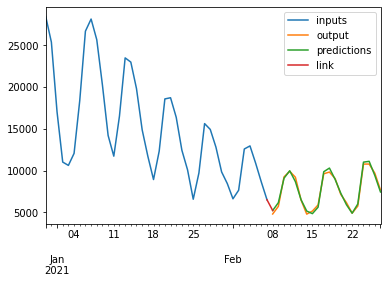

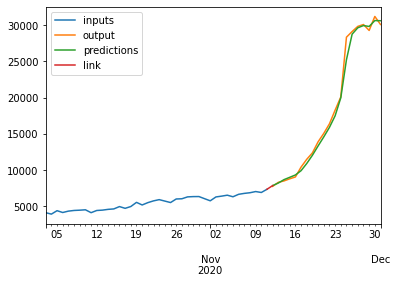

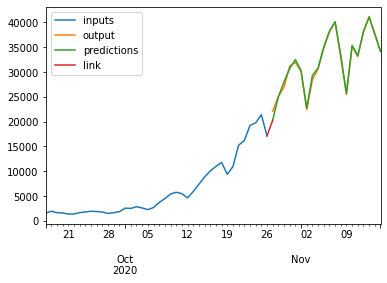

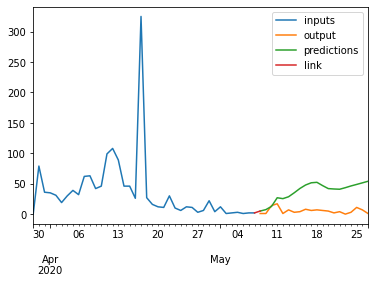

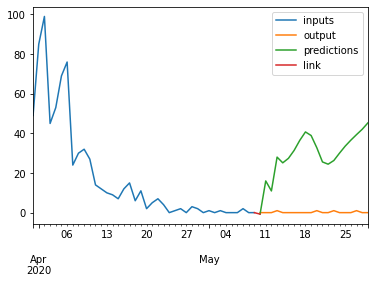

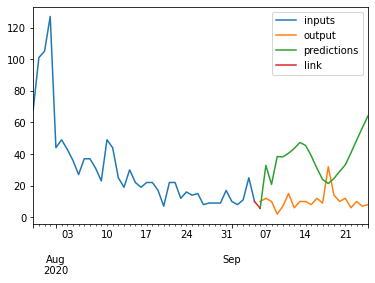

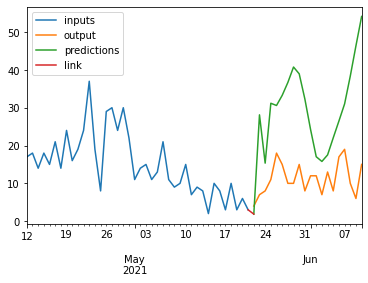

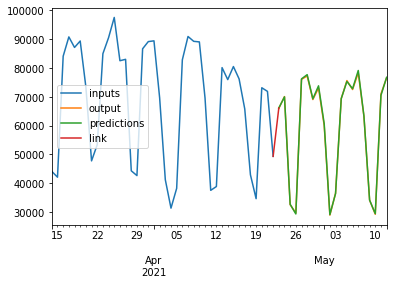

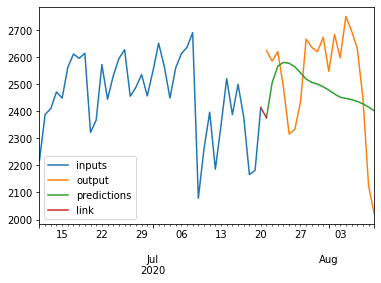

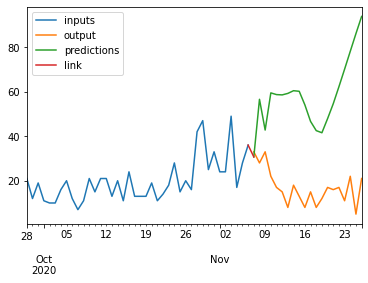

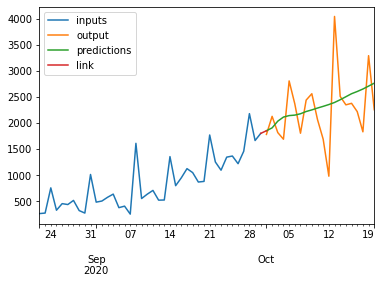

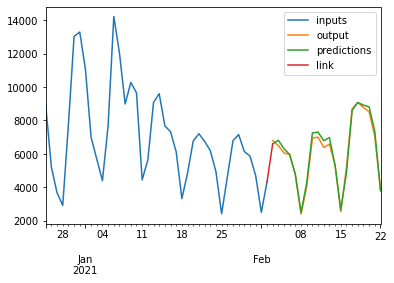

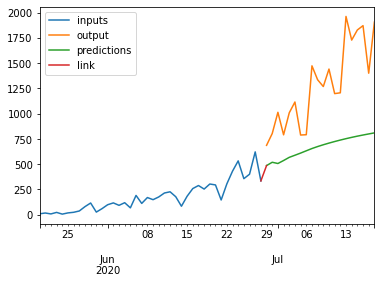

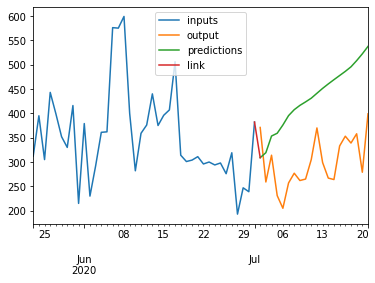

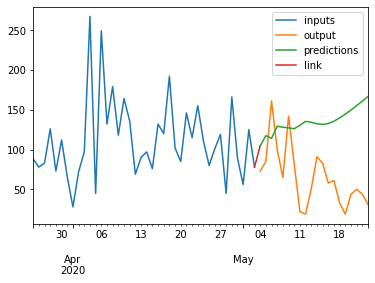

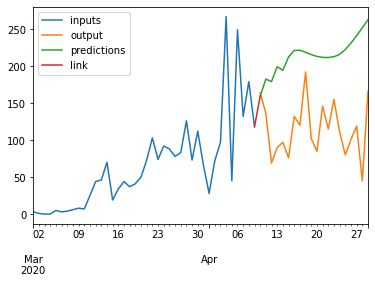

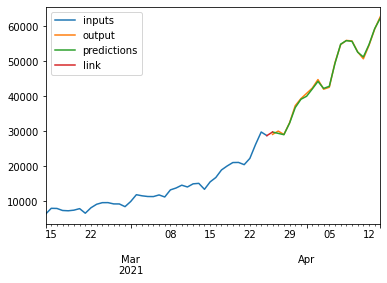

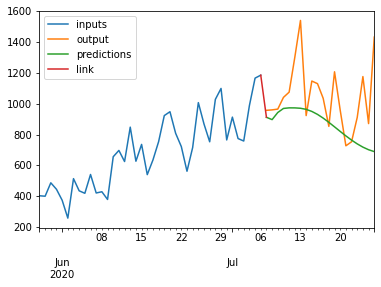

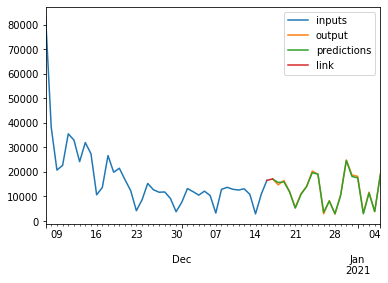

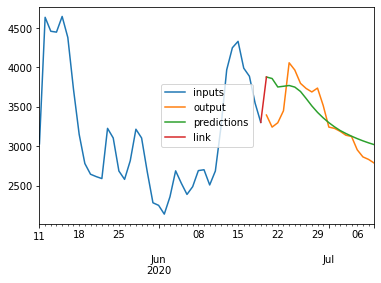

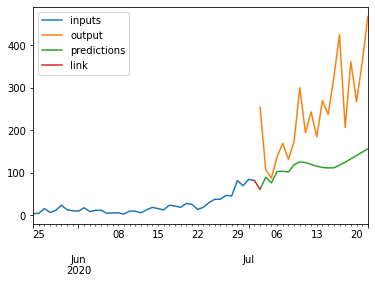

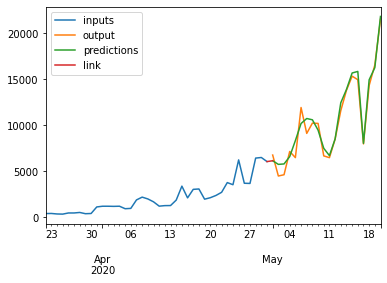

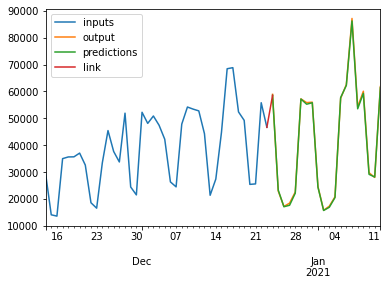

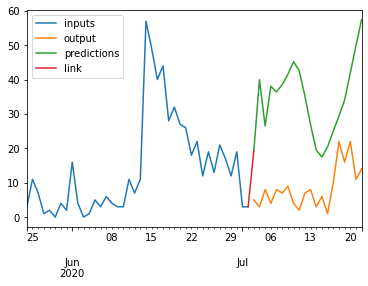

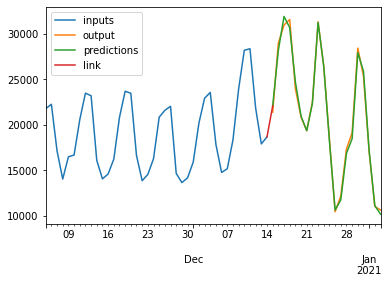

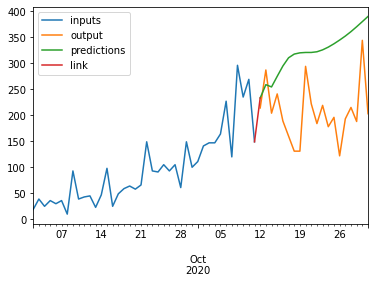

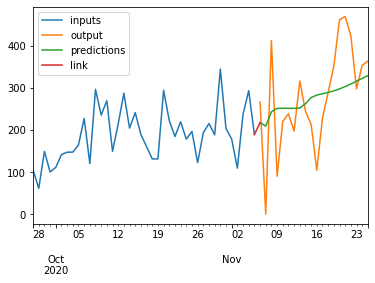

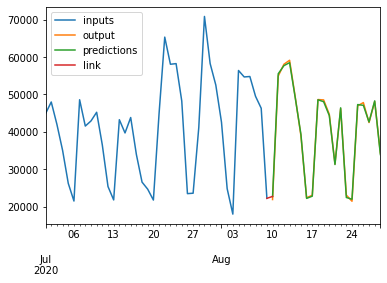

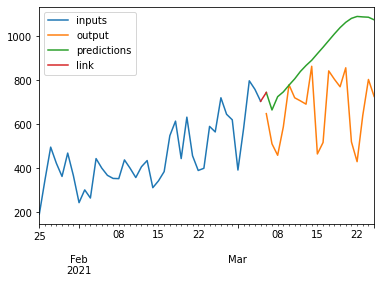

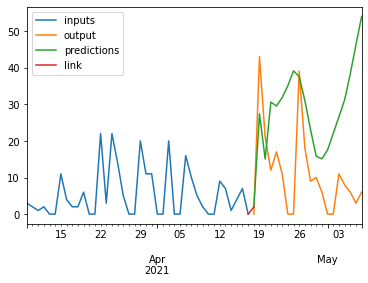

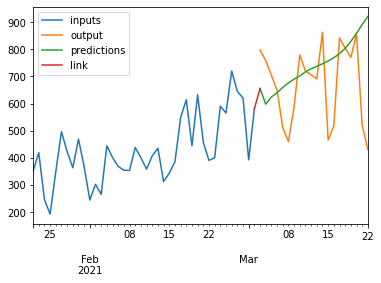

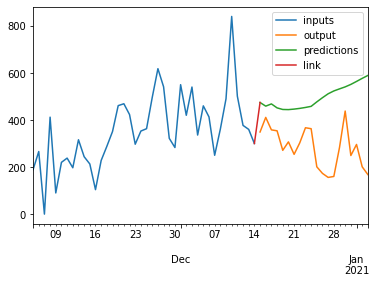

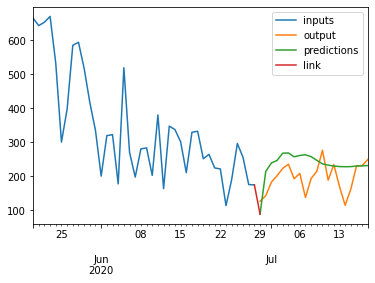

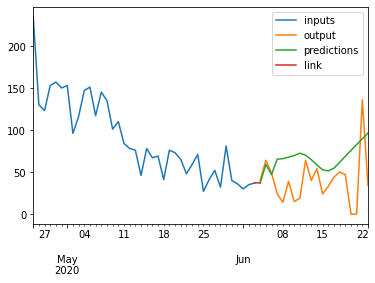

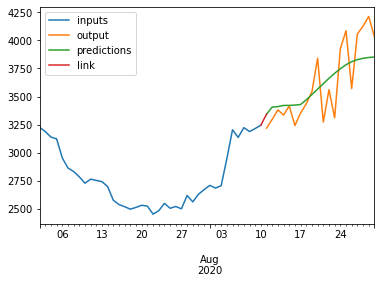

In [11]:
for i in np.random.randint(0, predictions.shape[0], (50,)):
    show(i, last_in_dates, input_seq, output_seq, predictions)

In [79]:
output_seq[_, -1].shape

IndexError: index 7258 is out of bounds for axis 0 with size 7258

In [37]:
[np.full((19,), np.nan),np.array(input_seq[i, -1, 1]), np.array(predictions[i, 0, 0]), np.full((19,), np.nan)]

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]),
 array(370.),
 array(333.20328, dtype=float32),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan])]